# Adopciones en la Ciudad de Buenos Aires

<center><img src='foto_flia.jpg' width=500></center>

## Análisis exploratorio

En este análisis se exhibe la cantidad de adopciones que se inscribieron en el año 2019, en la Ciudad Autónoma de Buenos Aires, junto a una serie de conclusiones derivadas de dicha información. 

Entre los interrogantes que se responden, a través de esta exploración, se encuentran los siguientes: ¿dentro de qué subtipo de adopción hay más casos?, ¿cuáles son las edades más frecuentes entre los adoptados?, ¿cuál es el género de ellos?...

La autora (que no es especialista en Derecho de Familia) funda las conclusiones finales, exclusivamente, en el conjunto de datos examinados. Y realiza este trabajo a los fines de adquirir experiencia en programación y en ciencia de datos. Y, también, con el propósito de enriquecer su porfolio en GitHub.

El dataset original se encuentra publicado en este enlace: https://data.buenosaires.gob.ar/dataset/adopciones [Fecha de consulta: 8/2/2023]. Mientras que, con el Programa "Google Sheets" se visualizó preliminarmente la información y se agregó la columna "edad", entre otros, pequeños cambios.

### Breve introducción a la materia

En cuanto a la regulación normativa de esta cuestión en la República Argentina, el Código Civil y Comercial en el artículo 594 expresa que: "La adopción es una institución jurídica que tiene por objeto proteger el derecho de niños, niñas y adolescentes a vivir y desarrollarse en una familia que le procure los cuidados tendientes a satisfacer sus necesidades afectivas y materiales, cuando éstos no le pueden ser proporcionados por su familia de origen." Este mismo artículo, en otro párrafo, agrega: "La adopción se otorga sólo por sentencia judicial y emplaza al adoptado en el estado de hijo...". [Fuente: InfoLEG] 

Asimismo, el citado Código reconoce tres tipos de adopción (plena, simple o de integración), tal como se resume a continuación:

- Adopción plena: es irrevocable, confiere al adoptado la condición de hijo y extingue los vínculos jurídicos con la familia de origen, con la excepción de que subsisten los impedimentos matrimoniales. 

- Adopción simple: es revocable, confiere el estado de hijo al adoptado, pero no crea vínculos jurídicos con los parientes ni con el cónyuge del adoptante, salvo las excepciones previstas en la norma.

- De integración: se configura cuando se adopta al hijo del cónyuge o del conviviente.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/work/adopciones-2019.csv')
df

,fecha_inscripcion,fecha_nacimiento,genero,subtipo_adopcion,edad
0,2019-01-03 14:29:50,1991-01-04 0:00:00,Femenino,Adopción Plena,27
1,2019-01-08 11:00:08,2002-03-23 0:00:00,Masculino,Adopción Plena,16
2,2019-02-12 14:25:10,2000-03-12 0:00:00,Femenino,Adopción Simple,18
3,2019-02-13 10:49:07,2005-03-24 0:00:00,Femenino,Adopción Plena,13
4,2019-02-18 14:44:01,1990-04-24 0:00:00,Femenino,Adopción Plena,28
...,...,...,...,...,...
87,2019-08-22 13:25:12,1975-11-27 0:00:00,Femenino,Adopción Plena,43
88,2019-08-26 10:48:28,1996-05-04 0:00:00,Femenino,Adopción Simple,23
89,2019-08-26 11:49:41,1998-09-27 0:00:00,Masculino,Adopción Simple,20
90,2019-08-27 12:03:50,2012-12-11 0:00:00,Femenino,Adopción Plena,6


In [3]:
df.dtypes

fecha_inscripcion    object
fecha_nacimiento     object
genero               object
subtipo_adopcion     object
edad                  int64
dtype: object

### Desarrollo

- Cuadro 1

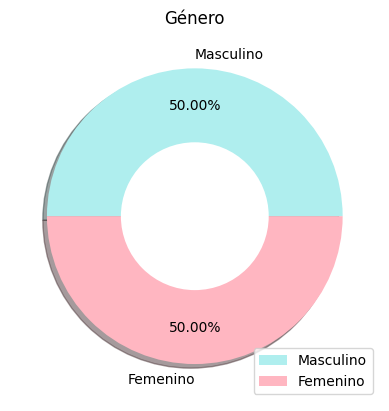

In [4]:
labels = ['Masculino', 'Femenino']
sizes = df['genero'].value_counts()
c = ['paleturquoise', 'lightpink']
plt.pie(sizes, labels=labels, colors=c, autopct='%1.2f%%', pctdistance = 0.75, shadow=True)
plt.title('Género')
cc = plt.Circle((0,0), 0.5, fc='white')
fig=plt.gcf()
fig.gca().add_artist(cc)
plt.savefig('plot.png', dpi=300)
plt.legend(loc="lower right")
plt.show()

- Cuadro 2

Adopción simple: 13 niños.
Adopción plena: 77 niños.
Adopción en el extranjero: 2 niños.


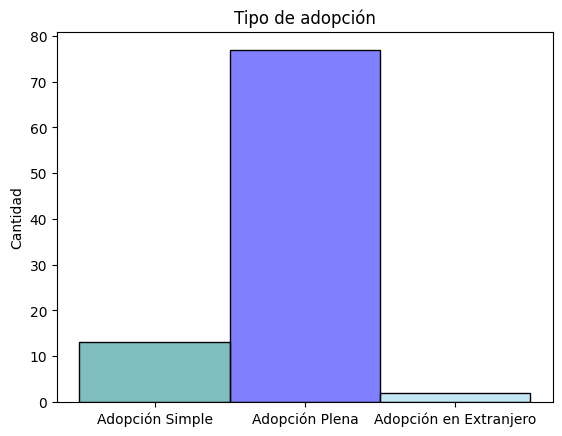

In [5]:
a_simple = df[df['subtipo_adopcion'] == 'Adopción Simple']
a_plena = df[df['subtipo_adopcion'] == 'Adopción Plena']
a_extranj = df[df['subtipo_adopcion'] == 'Adopción en Extranjero']

print('Adopción simple:', a_simple ['subtipo_adopcion'].count(), 'niños.')
print('Adopción plena:', a_plena ['subtipo_adopcion'].count(), 'niños.')
print('Adopción en el extranjero:', a_extranj ['subtipo_adopcion'].count(), 'niños.')

sns.histplot(a_simple['subtipo_adopcion'], color = 'teal', alpha = .5, fill = True)
sns.histplot(a_plena['subtipo_adopcion'], color = 'blue', alpha = .5, fill = True)
sns.histplot(a_extranj['subtipo_adopcion'], color = 'skyblue', alpha = .5, fill = True)
plt.title("Tipo de adopción")
plt.ylabel("Cantidad")
plt.xlabel("")
plt.show()



In [6]:
df['fecha_inscripcion'] = pd.to_datetime(df.fecha_inscripcion)
df['fecha_nacimiento'] = pd.to_datetime(df.fecha_nacimiento)

In [7]:
df.dtypes

fecha_inscripcion    datetime64[ns]
fecha_nacimiento     datetime64[ns]
genero                       object
subtipo_adopcion             object
edad                          int64
dtype: object

- Cuadro 3

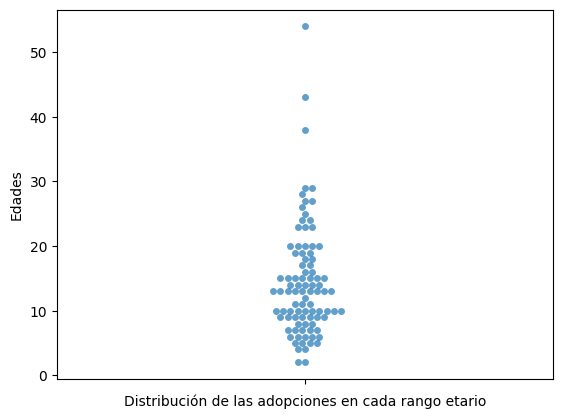

In [8]:
df = df.rename(columns = {
    "genero":"género",
   })
df.columns

sns.swarmplot(data=df, y='edad', alpha = 0.7)
plt.ylabel("Edades")
plt.xlabel("Distribución de las adopciones en cada rango etario")
plt.show()

In [9]:
df_edad = df['edad'].values
print('Edades', df_edad)
df_edad_mayores = df[df['edad'] > 17]
print('Hay una cantidad de', df_edad_mayores['edad'].count(), 
'adoptados que tienen 18 o más años de edad.')

Edades [27 16 18 13 28  7 17 20 24 26 10 12 17 19 14 10  4 14  2  2 38 24  7  9
  9 25 20  9  7  6 13 11 27 13 15  9  9 18 23  7  4  6  6 10  8 14  6  5
  5 13  5 10 54 15 13 11  8 29 10 15 29 19 23 11  9 14 20  9 10 16 13 19
 20 15 13  8 15 13  7 10 15 10 14 10 10 15 13 43 23 20  6  5]
Hay una cantidad de 25 adoptados que tienen 18 o más años de edad.


In [10]:
hasta_10 = df[df['edad'] <=9]
hasta_19 = df[(df['edad']>9) & (df['edad']<20)]
hasta_29 = df[(df['edad']>19) & (df['edad']<30)]
hasta_39 = df[(df['edad']>29) & (df['edad']<40)]
hasta_49 = df[(df['edad']>39) & (df['edad']<50)]
hasta_59 = df[(df['edad']>49) & (df['edad']<60)]

print('Hay', hasta_10 ['edad'].count(), 'adoptados que tienen entre 0 y 9 años.')
print('Hay', hasta_19 ['edad'].count(), 'adoptados que tienen entre 10 y 19 años.')
print('Hay', hasta_29 ['edad'].count(), 'adoptados que tienen entre 20 y 29 años.')
print('Hay', hasta_39 ['edad'].count(), 'adoptado que tiene entre 30 y 39 años.')
print('Hay', hasta_49 ['edad'].count(), 'adoptado que tiene entre 40 y 49 años.')
print('Hay', hasta_59 ['edad'].count(), 'adoptado que tiene entre 50 y 59 años.')

Hay 28 adoptados que tienen entre 0 y 9 años.
Hay 44 adoptados que tienen entre 10 y 19 años.
Hay 17 adoptados que tienen entre 20 y 29 años.
Hay 1 adoptado que tiene entre 30 y 39 años.
Hay 1 adoptado que tiene entre 40 y 49 años.
Hay 1 adoptado que tiene entre 50 y 59 años.


- Cuadro 4

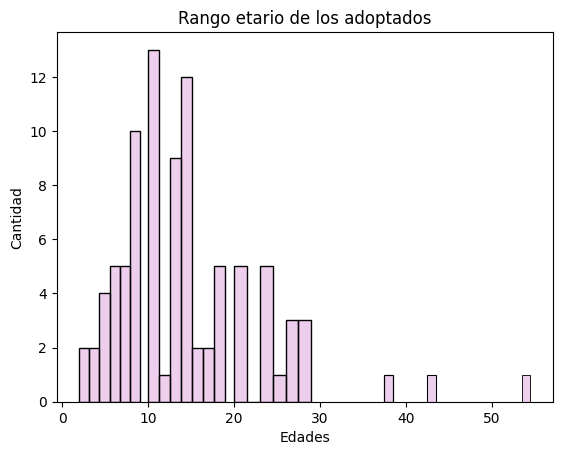

In [11]:
sns.histplot(hasta_10['edad'], color = 'plum', alpha = .5, fill = True)
sns.histplot(hasta_19['edad'], color = 'plum', alpha = .5, fill = True)
sns.histplot(hasta_29['edad'], color = 'plum', alpha = .5, fill = True)
sns.histplot(hasta_39['edad'], color = 'plum', alpha = .5, fill = True)
sns.histplot(hasta_49['edad'], color = 'plum', alpha = .5, fill = True)
sns.histplot(hasta_59['edad'], color = 'plum', alpha = .5, fill = True)
plt.title("Rango etario de los adoptados")
plt.ylabel("Cantidad")
plt.xlabel("Edades")
plt.show()

### Conclusiones

- Como primera conclusión, sobre la base del cuadro 1, puede decirse que existe la misma cantidad de adoptados, en lo relativo al género. Este dataset cuenta con 92 registros.

- En lo referente al tipo de adopción, tal como se desprende del cuadro 2, existe una mayor cantidad del subtipo de adopción plena (77 casos) y, a la par, una cantidad bastante menor de casos del subtipo de adopción simple (13 casos). Asimismo, existen 2 casos de adopciones realizadas en el extranjero.

- Finalmente, en cuanto al rango etario de los adoptados, en los cuadros 3 y 4 se exhibe esta información. Hay una cantidad de 25 adoptados que tienen 18 o más años de edad. Mientras que, la persona mayor de las adoptadas tiene 54 años; luego, hay una persona de 43 años, otra de 38 años y 17 personas que tienen entre 20 y 29 años de edad.

### Información adicional

Para obtener mayor información sobre la presente temática puede ingresarse en el sitio web oficial a nivel nacional. También, puede visitarse el sitio propio de la Ciudad Autónoma de Buenos Aires. Asimismo, las provincias poseen sitios oficiales sobre esta materia.

 María Inés Abarrategui Fernández Linkedin

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ea004b1-d450-4e40-8e2a-b2454d1071e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>